<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Machine Learning in Finance Lab_Week 04

## due 2023-02-19 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

# Basic import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import warnings
import sklearn as sk
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
housing = pd.read_csv(
    "/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 04/housing.csv"
)

# Part 1: EDA

## Scatter Plot Martix

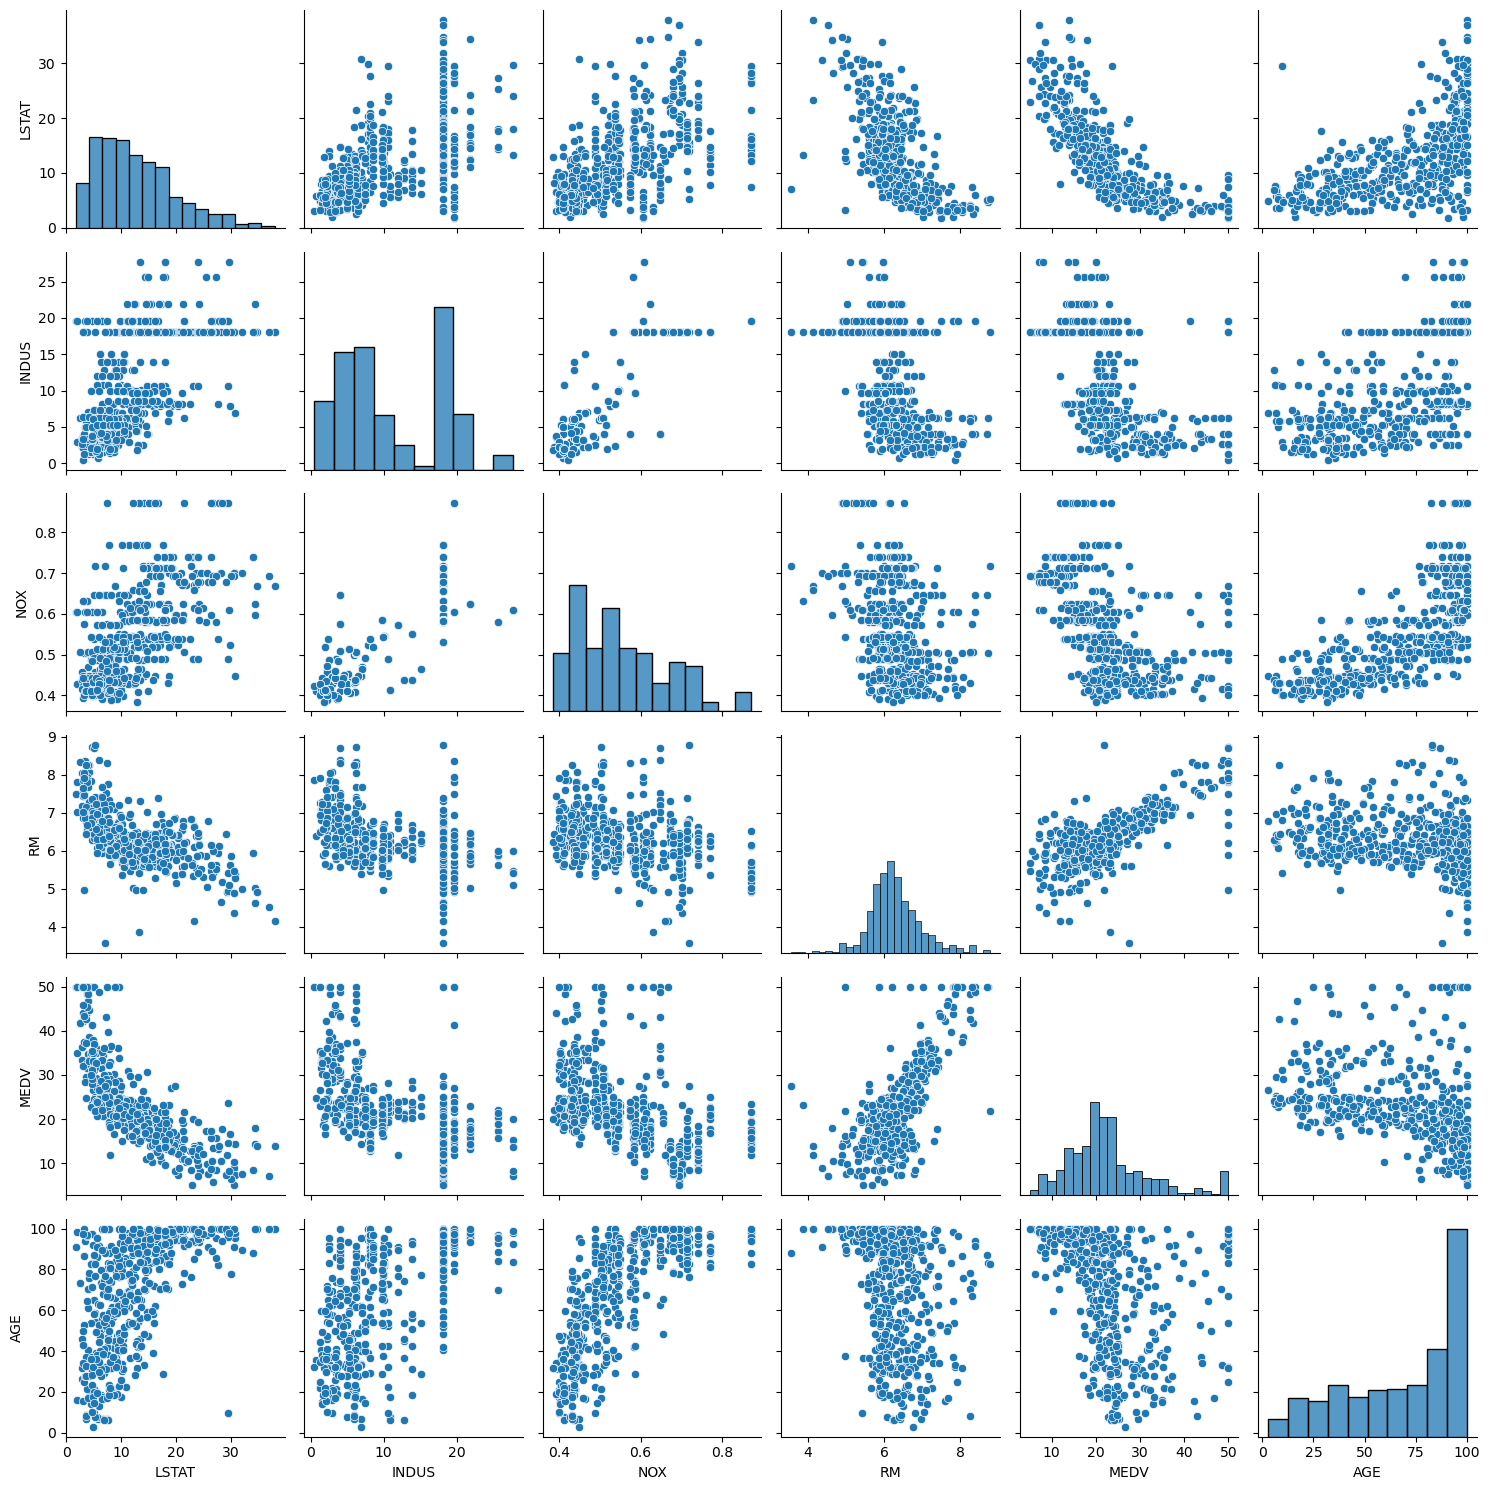

In [4]:
cols = ['LSTAT', "INDUS", "NOX", "RM", "MEDV", "AGE"]
sns.pairplot(housing[cols], size = 2.5)
plt.tight_layout()
plt.show()

##   Print the shape out 

In [5]:
labels = list(housing.columns)
n_column = len(labels)
n_row = len(housing)

print("The number of Columns is", n_column, ".")
print("The number of Rows is", n_row, ".")

The number of Columns is 14 .
The number of Rows is 506 .


## Print the nature out 

In [6]:
nl = []
sl = []
ol = []

for label in labels:
    Number = 0
    String = 0
    Other = 0

    for i in housing[label]:
        if type(i) == str:
            String += 1
        elif (type(i) == int) or (type(i) == float):
            Number += 1
        else:
            Other += 1
    nl.append(Number)
    sl.append(String)
    ol.append(Other)

Output = {
    "Label": labels,
    "Number": nl,
    "String": sl,
    "Other": ol
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,CRIM,506,0,0
1,ZN,506,0,0
2,INDUS,506,0,0
3,CHAS,506,0,0
4,NOX,506,0,0
5,RM,506,0,0
6,AGE,506,0,0
7,DIS,506,0,0
8,RAD,506,0,0
9,TAX,506,0,0


## Summary of Statistics

In [7]:
numer = np.array(housing['RM'])

#Mean, Var and Std
print('μ =', numer.mean(), 'Var =', numer.var(), "σ =", numer.std(),'\n')

#quantiles
def q(ds, n_q):
    result = []
    for i in range(n_q+1):
        result.append(np.percentile(ds, i*(100)/n_q))
    return result
print("Boundaries for 4 Equal Percentiles\n",q(numer, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles\n",q(numer, 10), "\n")

#catagorical analysis
cat = list(housing.columns)
neat_cat = list(set(cat))
print("Unique Label Values \n", neat_cat)

#count catagorics 
counts = []
for i in neat_cat:
    counts.append(sum(housing.columns == i))
Output = {
    "Types" : neat_cat,
    "Counts" : counts
}
Output = pd.DataFrame(Output)
Output = Output.set_index("Types")
Output

μ = 6.284634387351779 Var = 0.49269521612976297 σ = 0.7019225143345689 

Boundaries for 4 Equal Percentiles
 [3.561, 5.8854999999999995, 6.2085, 6.6235, 8.78] 

Boundaries for 10 Equal Percentiles
 [3.561, 5.593500000000001, 5.837, 5.9505, 6.086, 6.2085, 6.376, 6.5024999999999995, 6.75, 7.1515, 8.78] 

Unique Label Values 
 ['TAX', 'ZN', 'INDUS', 'CRIM', 'RM', 'B', 'LSTAT', 'DIS', 'MEDV', 'NOX', 'PTRATIO', 'AGE', 'RAD', 'CHAS']


,Counts
Types,
TAX,1
ZN,1
INDUS,1
CRIM,1
RM,1
B,1
LSTAT,1
DIS,1
MEDV,1


## QQ Plot

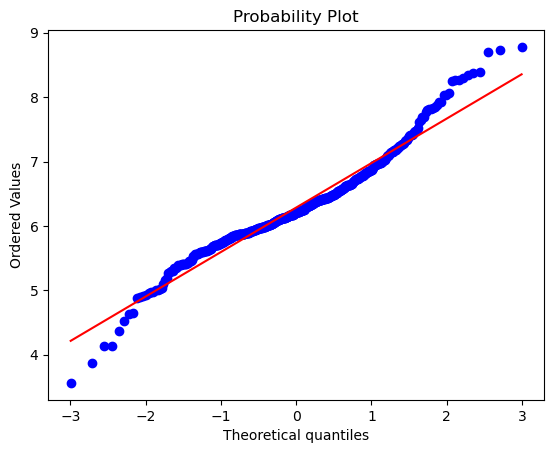

P-Value: 5.90260814347777e-09
Reject H0: Client_Trade_Percentage is Normally distributed.


In [8]:
stats.probplot(housing['RM'], dist="norm", plot=pylab)
pylab.show()
print("P-Value:", stats.normaltest(housing['RM'])[1])
print("Reject H0: Client_Trade_Percentage is Normally distributed.")

## Print Summary of data

In [9]:
summary = housing.describe()
print(summary)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Plot out data

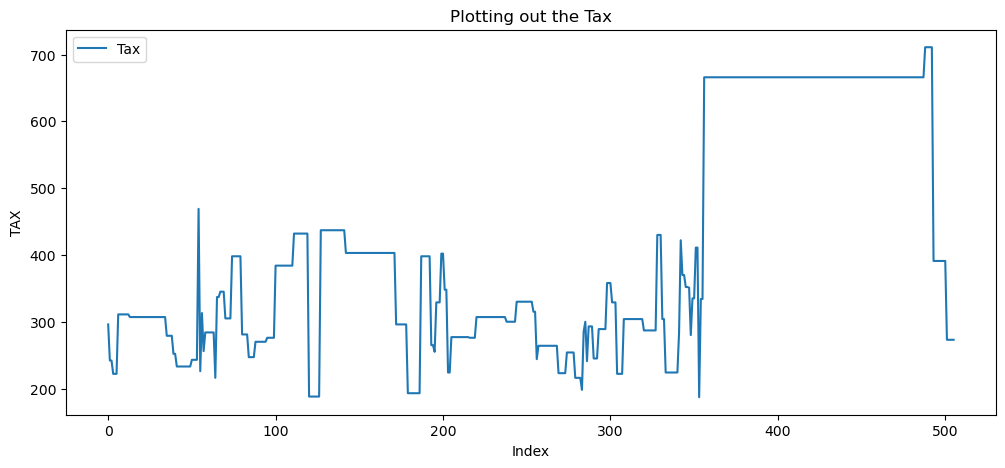

In [10]:
plt.figure(figsize=[12,5])
plt.plot(housing['TAX'], label = 'Tax')
plt.xlabel('Index')
plt.ylabel('TAX')
plt.title('Plotting out the Tax')
plt.legend()
plt.show()

## Cross Plotting Pairs of Attributes (Scatter Plot)

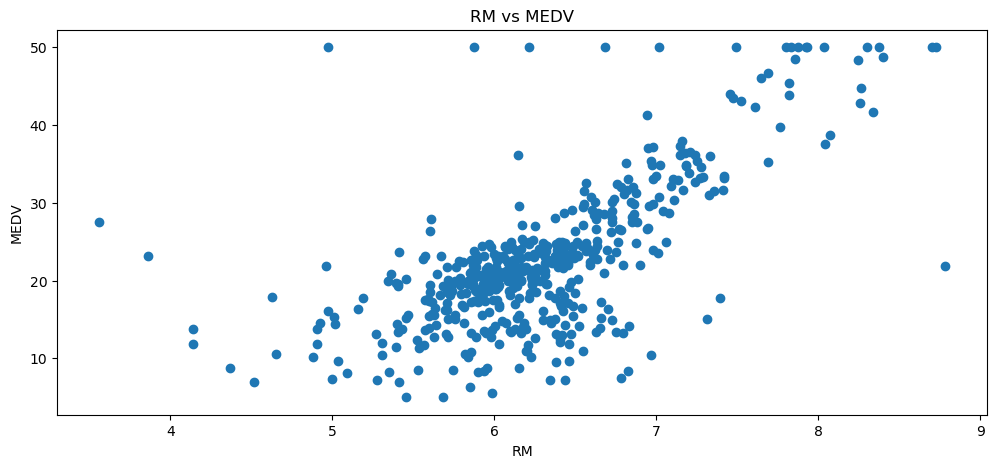

In [11]:
plt.figure(figsize=[12,5])
plt.scatter(housing['RM'], housing['MEDV'])
plt.title("RM vs MEDV")
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

## Correlation 

In [12]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Correlation Visualization

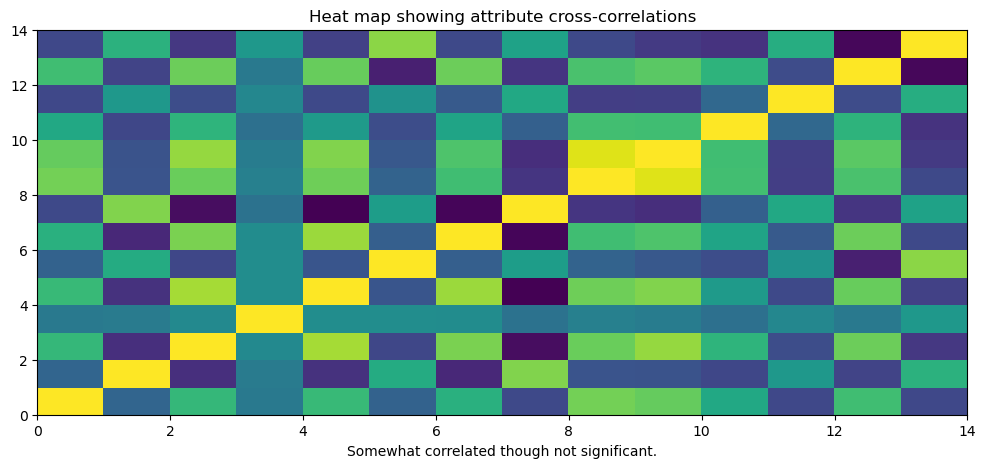

In [13]:
#calculate correlations between real-valued attributes
corMat = pd.DataFrame(housing.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Heat map showing attribute cross‐correlations")
plt.pcolor(corMat)
plt.xlabel('Somewhat correlated though not significant.')
plt.show()

# Part 2: Linear Regression

## Data Spliting 

In [14]:
X = housing.drop('MEDV', axis = 1).values
y = housing['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 
print(X_train.shape, y_train.shape)

(404, 13) (404,)


## Fitting Simple Linear

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept:  30.246750993923946


## Plotting Out

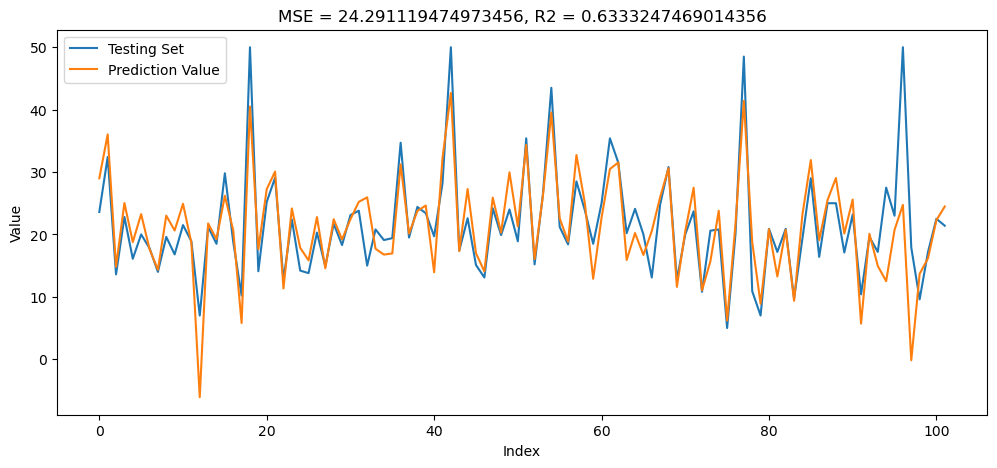

In [16]:
mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)
plt.figure(figsize=[12,5])
plt.plot(y_test, label = "Testing Set")
plt.plot(y_pred, label = "Prediction Value")
plt.legend()
plt.title("MSE = "+str(mse)+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

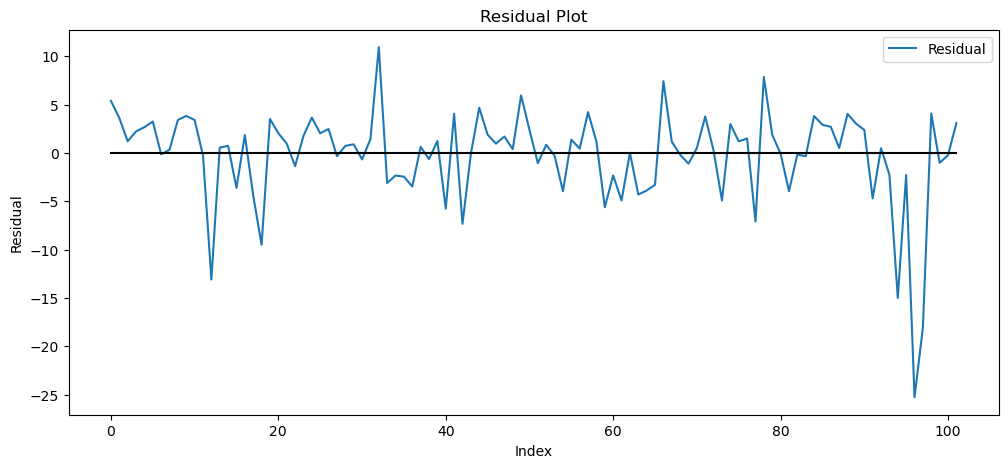

In [17]:
plt.figure(figsize=[12,5])
plt.plot(y_pred - y_test, label = "Residual")
plt.plot(np.zeros_like(y_pred ), c = 'black')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.legend()
plt.show()

# Part 3: Ridge Regression

## Fitting Ridge

Here I regress Ridge on several different alpha's, and choose the best alpha by each R2 and MSE.  

In [18]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

best_r2_ridge = 0
α_r2_ridge = 0
best_mse_ridge = 99999999
α_mse_ridge = 0

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    y_pred = ridge.predict(X_test)
    
    r2 = R2(y_pred, y_test)
    mse = MSE(y_pred, y_test)
    
    if best_r2_ridge < r2:
        best_r2_ridge = r2
        α_r2_ridge = alpha
        
    if best_mse_ridge > mse:
        best_mse_ridge = mse
        α_mse_ridge = alpha
    
    print("α= ", alpha, ", R2= ", r2, ", MSE = ", mse)
    print("Coefficients= ", ridge.coef_, ", Intercept= ", ridge.intercept_)

α=  0.1 , R2=  0.63326467382235 , MSE =  24.301025500192765
Coefficients=  [-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01] , Intercept=  29.366271272576622
α=  1.0 , R2=  0.6316692350060937 , MSE =  24.477191227708687
Coefficients=  [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01] , Intercept=  25.104099233774445
α=  10.0 , R2=  0.6289205768176517 , MSE =  24.648347618693638
Coefficients=  [-0.10713363  0.03555248 -0.02627747  1.81329133 -1.88924475  4.19532572
 -0.01534126 -1.23262135  0.24803063 -0.01274419 -0.76176896  0.01283334
 -0.561835  ] , Intercept=  22.439732052473854
α=  100.0 , R2=  0.6264261086866869 , MSE =  23.465902589086465
Coefficients=  [-1.10

## Plotting Out

Plot the fitted value and residual for the best fit that picked by each R2 and MSE.

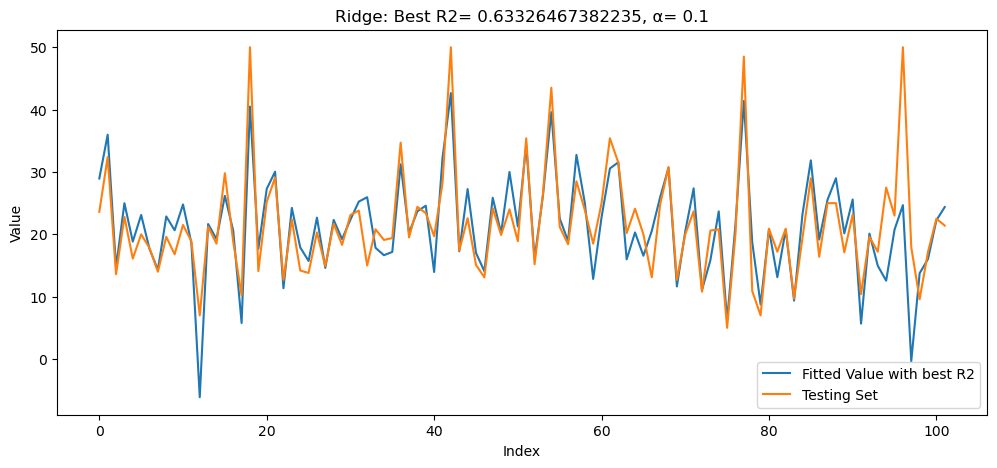

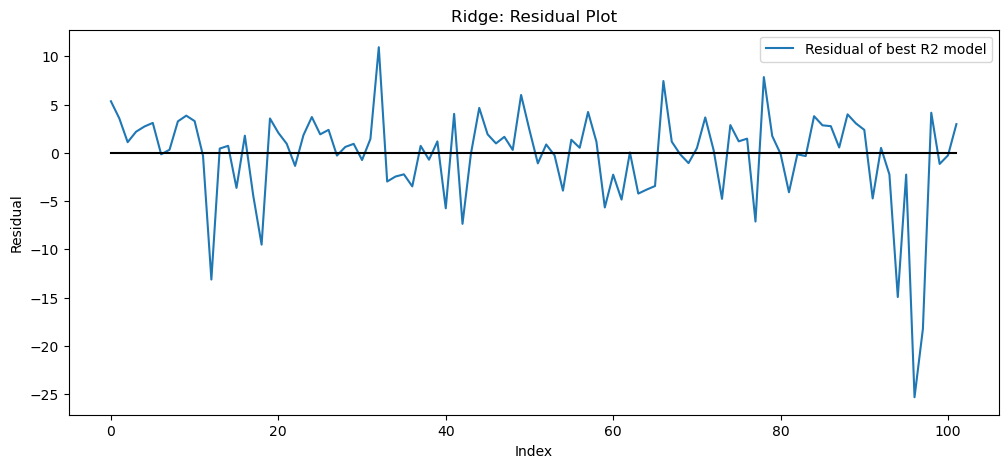

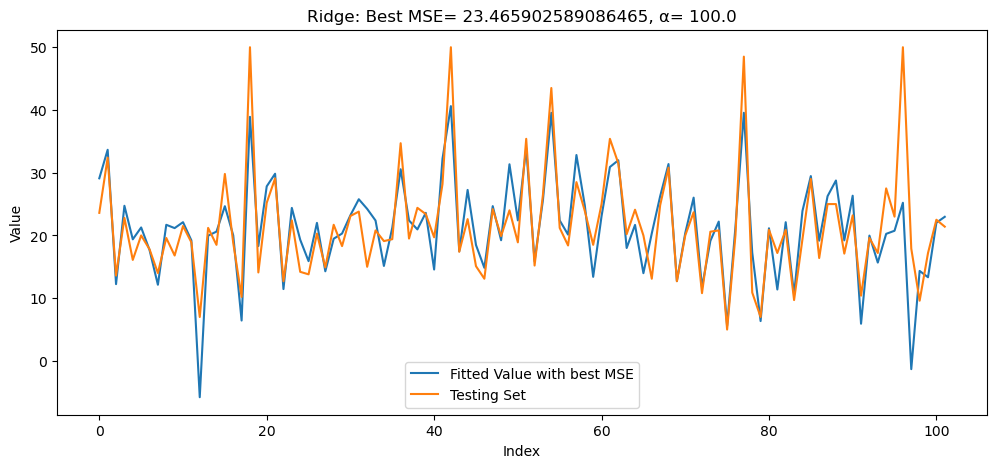

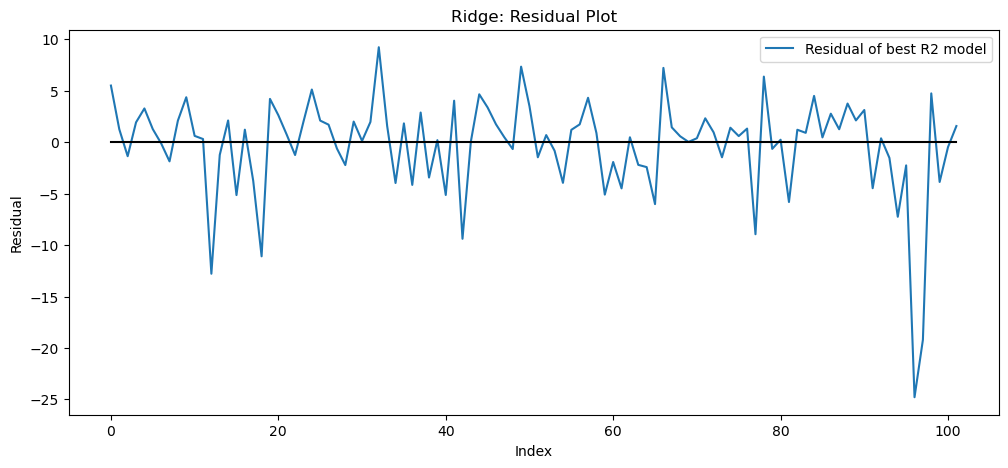

In [19]:
ridge_r2 = Ridge(alpha=α_r2_ridge)
ridge_r2.fit(X_train, y_train)
y_pred_r2_ridge = ridge_r2.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_ridge, label = 'Fitted Value with best R2')
plt.plot(y_test, label = 'Testing Set')
plt.title("Ridge: Best R2= "+str(best_r2_ridge)+", α= "+str(α_r2_ridge))
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_ridge - y_test, label = "Residual of best R2 model")
plt.plot(np.zeros_like(y_pred_r2_ridge), c = 'black')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Ridge: Residual Plot")
plt.legend()
plt.show()

ridge_mse = Ridge(alpha=α_mse_ridge)
ridge_mse.fit(X_train, y_train)
y_pred_mse_ridge = ridge_mse.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_ridge, label = 'Fitted Value with best MSE')
plt.plot(y_test, label = 'Testing Set')
plt.title("Ridge: Best MSE= "+str(best_mse_ridge)+", α= "+str(α_mse_ridge))
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_ridge - y_test, label = "Residual of best R2 model")
plt.plot(np.zeros_like(y_pred_mse_ridge), c = 'black')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Ridge: Residual Plot")
plt.legend()
plt.show()

From the R2, alpha = 0.1 provides the best fit. 

Howeverm from the MSE, alpha= 100 provides the best fit (means the simple linear regression). 

# Part 4: Lasso Regression

Here I regress Lasso on several different alpha's, and choose the best alpha by each R2 and MSE.

## Fitting Lasso 

In [20]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
best_r2_lasso = 0
α_r2_lasso = 0
best_mse_lasso = 99999999
α_mse_lasso = 0

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)
    
    r2 = R2(y_pred, y_test)
    mse = MSE(y_pred, y_test)
    
    if best_r2_lasso < r2:
        best_r2_lasso = r2
        α_r2_lasso = alpha
        
    if best_mse_lasso > mse:
        best_mse_lasso = mse
        α_mse_lasso = alpha
    
    print("α= ", alpha, ", R2= ", r2, ", MSE = ", mse)
    print("Coefficients= ", lasso.coef_, ", Intercept= ", lasso.intercept_)

α=  0.1 , R2=  0.6201889701292775 , MSE =  25.15559375393417
Coefficients=  [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442] , Intercept=  19.859769480417448
α=  1.0 , R2=  0.557902070885584 , MSE =  24.409489761299707
Coefficients=  [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661] , Intercept=  34.9357803779119
α=  10.0 , R2=  0.04581718014897673 , MSE =  34.68576620696991
Coefficients=  [-0.          0.00632092 -0.          0.          0.          0.
  0.         -0.          0.         -0.0090727  -0.          0.00989229
 -0.60414765] , Intercept=  30.390737497013138
α=  100.0 , R2=  -2.576371486602292 , MSE =  55.32016002797253
Coefficients=  [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.02071289 -0.       

## Plotting Out

Plot the fitted value and residual for the best fit that picked by each R2 and MSE. 

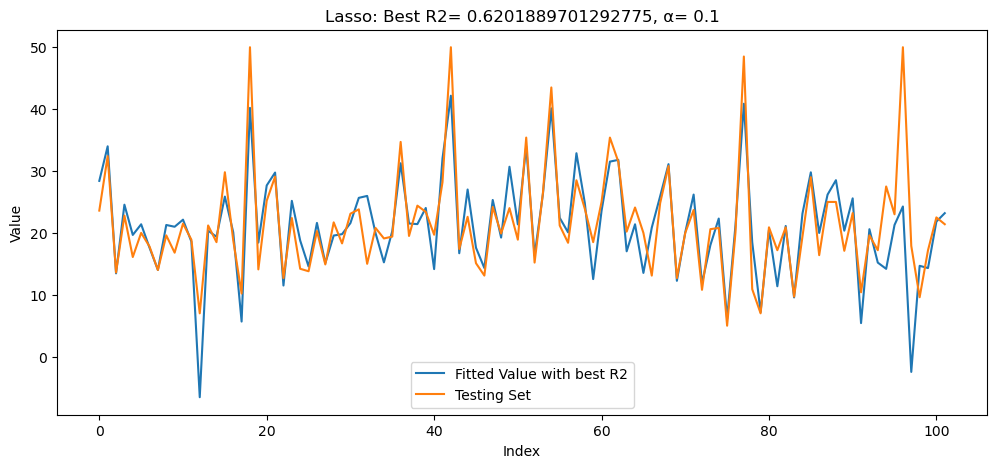

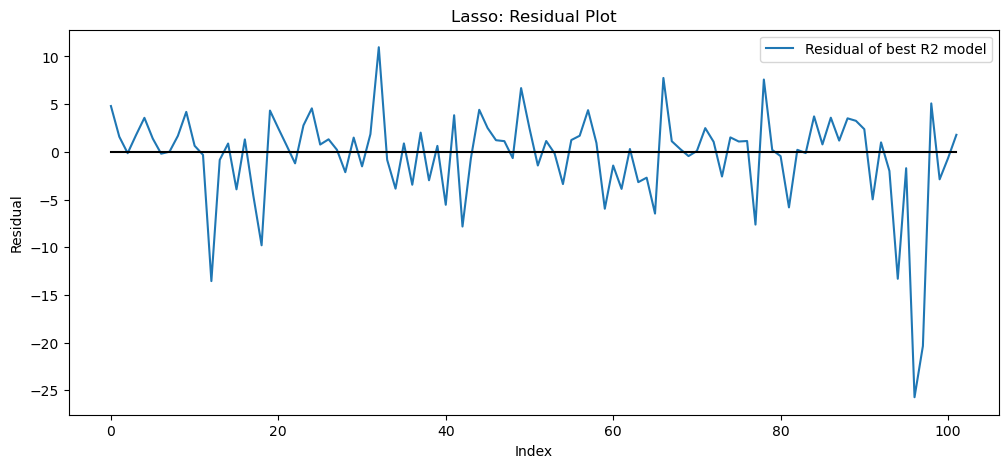

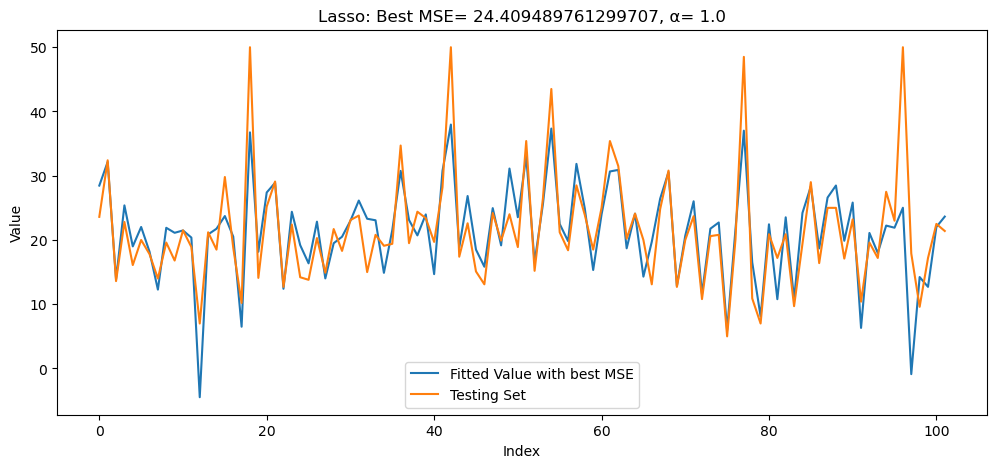

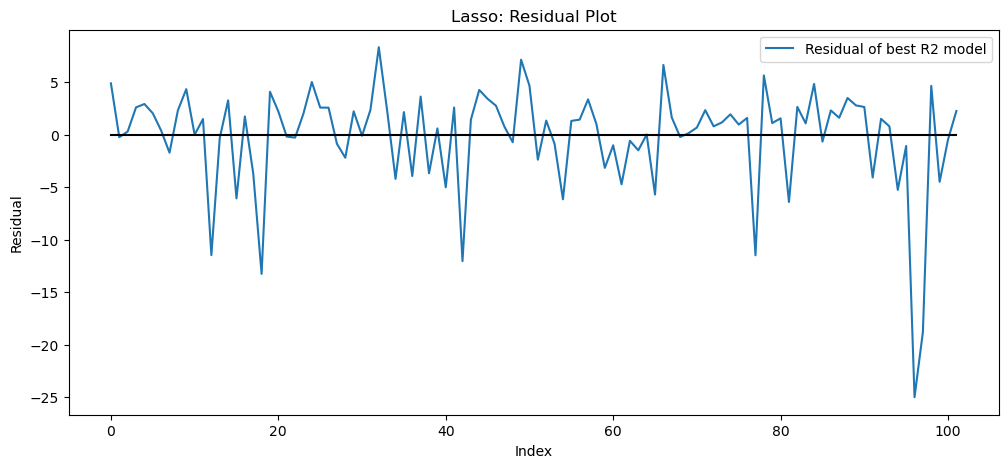

In [21]:
lasso_r2 = Lasso(alpha=α_r2_lasso)
lasso_r2.fit(X_train, y_train)
y_pred_r2_lasso = lasso_r2.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_lasso, label = 'Fitted Value with best R2')
plt.plot(y_test, label = 'Testing Set')
plt.title("Lasso: Best R2= "+str(best_r2_lasso)+", α= "+str(α_r2_lasso))
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_lasso - y_test, label = "Residual of best R2 model")
plt.plot(np.zeros_like(y_pred_r2_lasso), c = 'black')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Lasso: Residual Plot")
plt.legend()
plt.show()

lasso_mse = Lasso(alpha=α_mse_lasso)
lasso_mse.fit(X_train, y_train)
y_pred_mse_lasso = lasso_mse.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_lasso, label = 'Fitted Value with best MSE')
plt.plot(y_test, label = 'Testing Set')
plt.title("Lasso: Best MSE= "+str(best_mse_lasso)+", α= "+str(α_mse_lasso))
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_lasso - y_test, label = "Residual of best R2 model")
plt.plot(np.zeros_like(y_pred_mse_lasso), c = 'black')
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Lasso: Residual Plot")
plt.legend()
plt.show()

For R2, α = 0.1 provides the best fit. 

However, for MSE, α = 1 provides the best fit. 

# Part 5: Conclusion

From the EDA, we can see that NOT ALL features have strong relationship with target. As a result, I think it will be better if we apply best subsets selection to see which features could be signifcant, rather than put all features into regression.

From simple linear regression(SLR), outsample R2 is about 63%, which is not quite decent. I would say this is because we include too much features in it, which cause "Overfitting". If I were to ameliorate this model, I will divide the dataset into 60% of training set, 20% as validation set and rest 20% as testing set. We then apply best model selection, use 60% to train the model, 20 to get the outsample R2 (or MSE) and thus get the best subset, and rest to see the performance. Putting all features in the model is not always a good idea. 

From Lasso and Ridge Regression, I would say there is no big difference in their performance compared to SLR. Still overfitting. We can see that if our input is not "neat", using any kind of regression will not provide even better outcome. We still need to work on the input itself first. 

# Part 6: Signing

In [22]:
print("My name is Yu-Ching Liao")
print("My NetID is: 656724372")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu-Ching Liao
My NetID is: 656724372
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>